In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.cross_validation import train_test_split

train = pd.read_csv('./files/x_train.csv', sep=';')
test = pd.read_csv('./files/x_test.csv', sep=';')
out = pd.read_csv('./files/y_train.csv', sep=';')

out = pd.DataFrame(np.array([[1]]), columns=['0']).append(out, ignore_index=True)

N = train.shape[0]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
(train_x, test_x, train_y, test_y) = train_test_split(train, out, test_size=0.3, random_state=0)

In [4]:
train_x.shape

(17702, 12)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_train.fit(train_x, train_y)

train_x_scaled = scaler_train.transform(train_x)
test_x_scaled = scaler_train.transform(test_x)

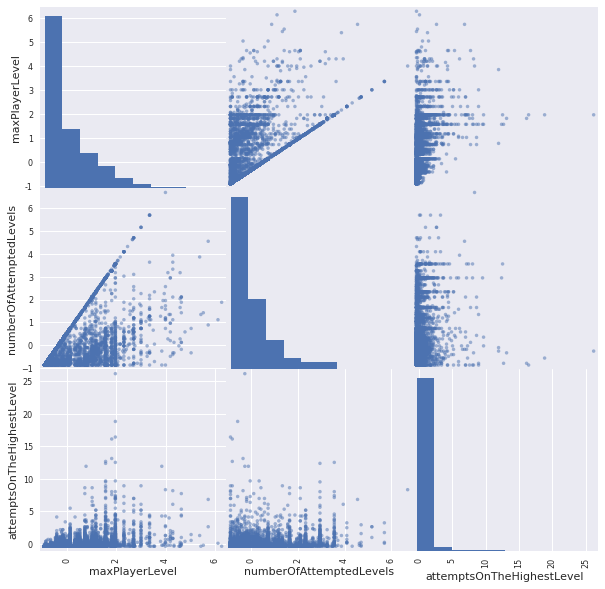

In [6]:
from pandas.tools.plotting import scatter_matrix

list_col = train_x.columns.values.tolist()
list_col_ = ['maxPlayerLevel', 'numberOfAttemptedLevels', 'attemptsOnTheHighestLevel']
data_numeric_scaled = pd.DataFrame(test_x_scaled, columns=list_col)
scatter_matrix(data_numeric_scaled[list_col_], alpha=0.5, figsize=(10, 10))
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

In [61]:
def write_answer(auc):
    with open("answer.txt", "w") as fout:
        for i in auc:
            fout.write(str(i)+'\n')

from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

import sklearn
from sklearn import grid_search

classifier = sklearn.linear_model.LogisticRegression(random_state = 0)

param_grid = {'C': [0.000001, 0.00001, 0.001, 0.01, 0.05, 0.1, 0.2, 1]}
hyper_params = grid_search.GridSearchCV(classifier, param_grid, cv = 3)

hyper_params.fit(train_x, train_y['0'].values)

prediction_y = hyper_params.best_estimator_.predict_proba(test_x)[:, 1]

roc = roc_auc_score(test_y, prediction_y)

final_prediction_y = hyper_params.best_estimator_.predict_proba(test)[:, 1]

write_answer(final_prediction_y)

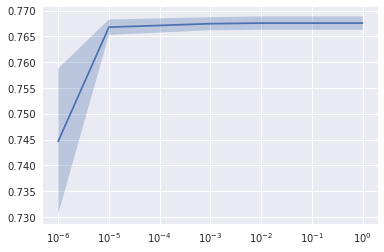

In [59]:
plot_scores(hyper_params)

In [58]:
#AUC-ROC
roc

0.73604671178088665